## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [6]:
import numpy as np

### Load and normalize our data

In [7]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


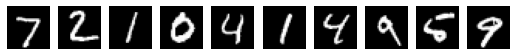

In [8]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model.

In [9]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 6)                 606       
                                                                 
 dense_12 (Dense)            (None, 100)               700       
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

### Train the autoencoder model.

In [10]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 25s 49ms/step - loss: 0.2327 - val_loss: 0.1899
Epoch 2/10
469/469 [==============================] - 23s 48ms/step - loss: 0.1789 - val_loss: 0.1714
Epoch 3/10
469/469 [==============================] - 23s 48ms/step - loss: 0.1625 - val_loss: 0.1567
Epoch 4/10
469/469 [==============================] - 22s 46ms/step - loss: 0.1509 - val_loss: 0.1456
Epoch 5/10
469/469 [==============================] - 22s 47ms/step - loss: 0.1425 - val_loss: 0.1399
Epoch 6/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1380 - val_loss: 0.1370
Epoch 7/10
469/469 [==============================] - 22s 47ms/step - loss: 0.1349 - val_loss: 0.1343
Epoch 8/10
469/469 [==============================] - 22s 47ms/step - loss: 0.1326 - val_loss: 0.1324
Epoch 9/10
469/469 [==============================] - 21s 46ms/step - loss: 0.1308 - val_loss: 0.1313
Epoch 10/10
469/469 [==============================] - 22s 47ms/step - loss: 0.129

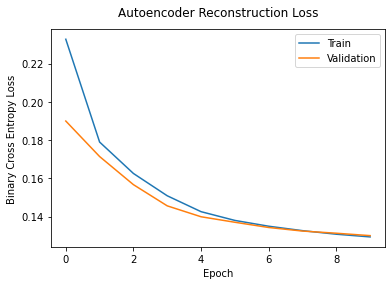

In [11]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 6ms/step


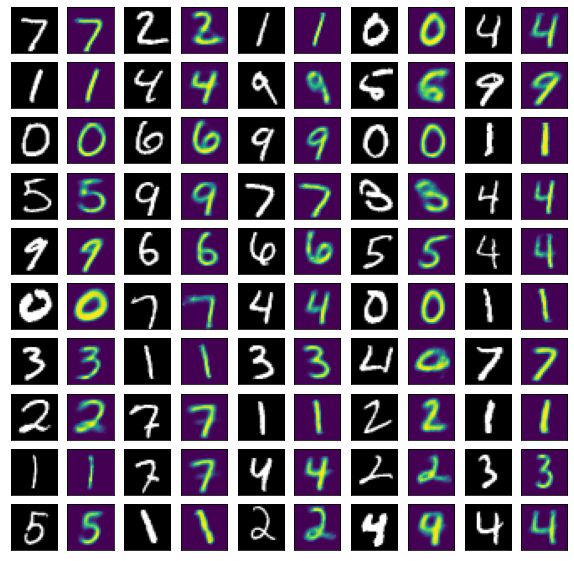

In [12]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Create an autoencoder model(for bottleneck of 100)

In [13]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 100 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               392500    
                                                                 
 dense_17 (Dense)            (None, 300)               150300    
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 300)               30300     
                                                                 
 dense_22 (Dense)            (None, 500)              

### Train the autoencoder model.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 26s 50ms/step - loss: 0.1740 - val_loss: 0.1192
Epoch 2/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1105 - val_loss: 0.1019
Epoch 3/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0984 - val_loss: 0.0935
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0924 - val_loss: 0.0893
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0884 - val_loss: 0.0861
Epoch 6/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0858 - val_loss: 0.0844
Epoch 7/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0838 - val_loss: 0.0824
Epoch 8/10
469/469 [==============================] - 20s 44ms/step - loss: 0.0824 - val_loss: 0.0820
Epoch 9/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0813 - val_loss: 0.0807
Epoch 10/10
469/469 [==============================] - 21s 46ms/step - loss: 0.080

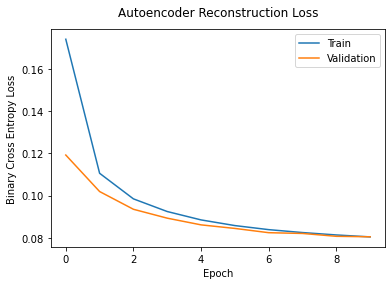

In [15]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 7ms/step


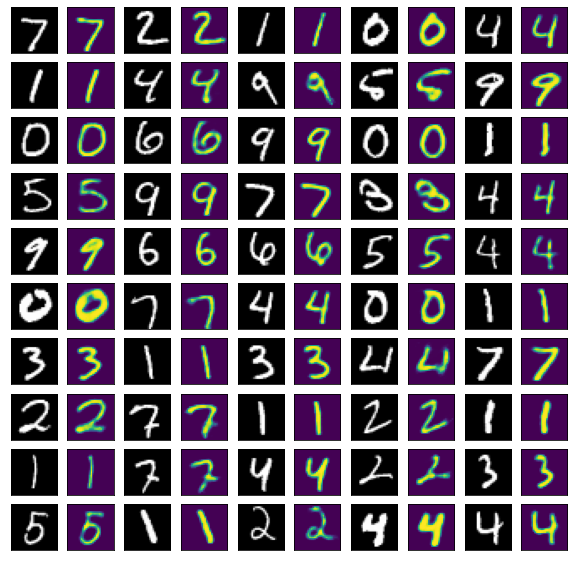

In [17]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

#We used binary cross-entropy loss as the evaluation metric to compare the performance of the two models. Our results show that the binary cross-entropy loss decreases more slowly and stabilizes at a higher value for the model with a bottleneck size of six neurons. This indicates that the updated model with a smaller bottleneck may not be able to capture all the relevant features of the input data, leading to lower reconstruction quality.

#with a bottleneck size of 100 neurons shows a rapid decrease in binary cross-entropy loss and stabilizes at a low value. This suggests that the larger bottleneck size can capture more information and lead to better reconstruction quality.

#The updated autoencoder model with a bottleneck size of six neurons may not perform as well as the original model with a bottleneck size of 100 neurons in terms of reconstruction quality. 